In [4]:
import json
import pandas as pd

# Load the data
with open('property_data.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()


,address,price,landsize,latitude,longitude,bedrooms,bathrooms,parking,house_type,image_url,...,median_age,families,child_per_family,child_per_household,houses,people_per_household,median_weekly_household_income,median_monthly_mortgage_repayment,median_weekly_rent,avg_vehicles_per_house
0,"11 Weston Street, Maddington",125000,260.0,-32.047369,115.989017,0,0,0,Land,https://imagecdn.reiwa.com.au/listing/37/45707...,...,35,3058,2.0,0.9,4897,2.7,1364,1509,300,1.9
1,"2B Parkview Street, Mandurah",125000,212.0,-32.535234,115.737148,0,0,0,Land,https://imagecdn.reiwa.com.au/listing/01/47272...,...,50,2044,1.6,0.4,5724,1.8,858,1250,270,1.3
2,"28A Mercer Way, Balga",125000,180.0,-31.849061,115.852564,0,0,0,Land,https://imagecdn.reiwa.com.au/listing/12/47910...,...,32,3348,1.8,0.7,6290,2.4,1299,1482,310,1.6
3,"35 Blackberry Drive, Ashby",125000,190.0,-31.730016,115.803761,0,0,0,Land,https://imagecdn.reiwa.com.au/listing/62/47821...,...,39,803,1.8,0.7,1234,2.4,1416,1863,380,1.7
4,"9 Racecourse Road, Pinjarra",125000,1012.0,-32.631957,115.882201,0,0,0,Land,https://imagecdn.reiwa.com.au/listing/22/47790...,...,43,1303,1.9,0.7,2120,2.4,1144,1517,290,2.0


In [5]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()

# Print missing values to confirm if there are any
print("Missing Values:\n", missing_values)

# Drop text-based fields except 'house_type'
text_fields = ['address', 'image_url', 'details_url', 'suburb']
numeric_df = df.drop(columns=text_fields)

# Check data types to confirm which fields are numeric
data_types = numeric_df.dtypes

# Fill missing numeric values with median, excluding 'house_type'
numeric_fields = numeric_df.drop(columns=['house_type'])
numeric_fields.fillna(numeric_fields.median(), inplace=True)

# Reassign cleaned data back to df, keeping 'house_type'
df[numeric_fields.columns] = numeric_fields

# Print data types and filled missing values
missing_values_after = df.isnull().sum()
print("Missing Values After Filling:\n", missing_values_after)
print("Data Types:\n", data_types)


Missing Values:
 address                              0
price                                0
landsize                             0
latitude                             0
longitude                            0
                                    ..
people_per_household                 0
median_weekly_household_income       0
median_monthly_mortgage_repayment    0
median_weekly_rent                   0
avg_vehicles_per_house               0
Length: 78, dtype: int64
Missing Values After Filling:
 address                              0
price                                0
landsize                             0
latitude                             0
longitude                            0
                                    ..
people_per_household                 0
median_weekly_household_income       0
median_monthly_mortgage_repayment    0
median_weekly_rent                   0
avg_vehicles_per_house               0
Length: 78, dtype: int64
Data Types:
 price                          

In [6]:
import numpy as np

# Remove rows where landsize is greater than 10,000
df = df[df['landsize'] <= 10000]

# Function to add noise to prices
def add_noise_to_prices(prices, noise_level=0.05):
    noise = np.random.uniform(-noise_level, noise_level, prices.shape)
    return prices * (1 + noise)

# Add noise to prices in the sold houses dataset
df['price'] = add_noise_to_prices(df['price'])

# Transform price (target) logarithmically
df['price'] = np.log(df['price'])

# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive statistics
desc_stats = df.describe()

# Function to display descriptive statistics in chunks
def display_desc_stats(desc_stats, chunk_size=8):
    for i in range(0, len(desc_stats.columns), chunk_size):
        print(desc_stats.iloc[:, i:i+chunk_size])
        print("\n")

# Display descriptive statistics in chunks of 8 columns
display_desc_stats(desc_stats)



          price  landsize  latitude  longitude  bedrooms  bathrooms   parking  \
count 177428.00 177428.00 177428.00  177428.00 177428.00  177428.00 177428.00   
mean      13.28    611.88    -32.04     115.85      3.23       1.67      1.65   
std        0.56    614.40      0.24       0.10      1.27       0.78      1.03   
min       11.68      0.50    -32.87     115.62      0.00       0.00      0.00   
25%       12.93    341.00    -32.14     115.77      3.00       1.00      1.00   
50%       13.22    532.00    -32.00     115.83      3.00       2.00      2.00   
75%       13.58    717.00    -31.87     115.93      4.00       2.00      2.00   
max       16.13  10000.00    -31.52     116.19     20.00      20.00     24.00   

       local_community_population  
count                   177428.00  
mean                     11060.51  
std                       4988.57  
min                          0.00  
25%                       7618.00  
50%                      11009.00  
75%               

<Figure size 2000x2000 with 0 Axes>

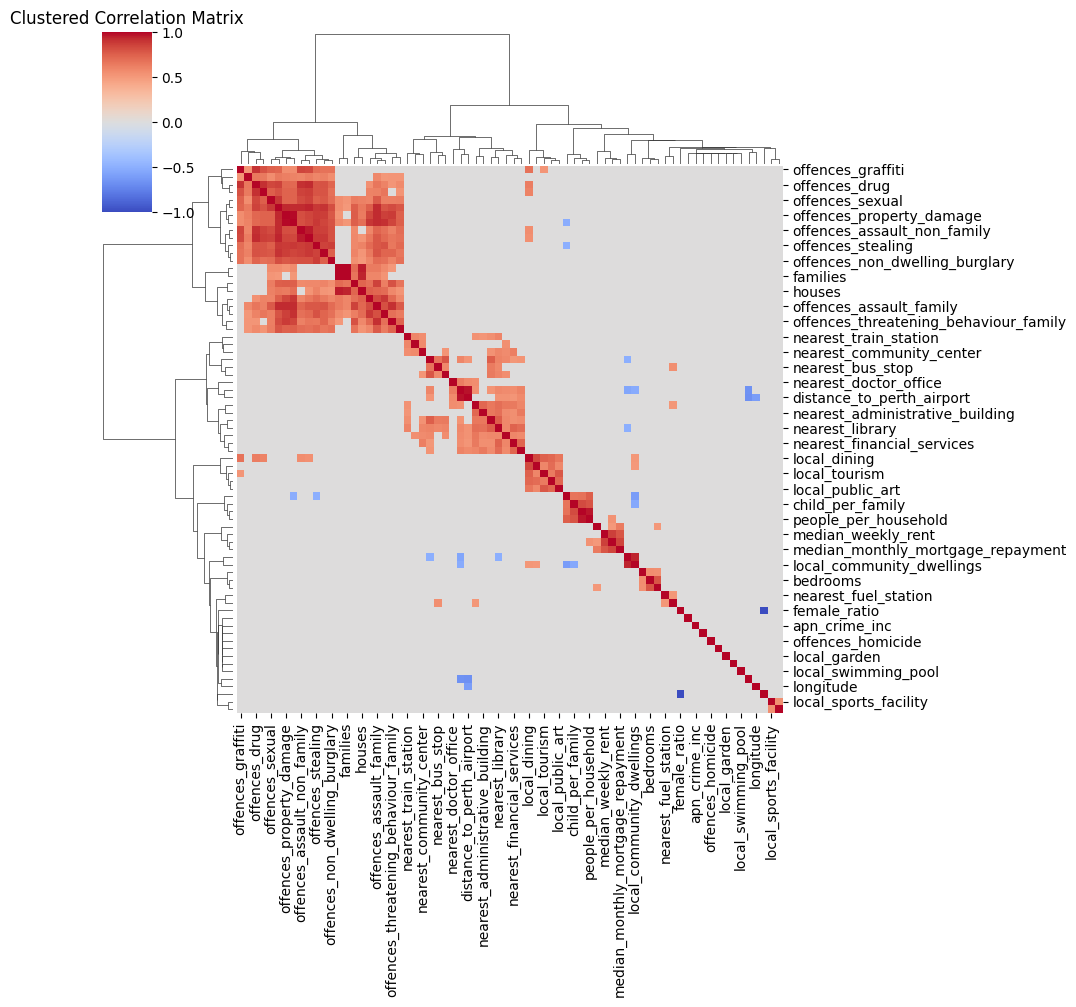

Strongest Positive Correlations (|corr| >= 0.7):
('people', 'families'): 1.00
('families', 'people'): 1.00
('offences_property_damage', 'ap_crime'): 0.99
('ap_crime', 'offences_property_damage'): 0.99
('distance_to_perth_airport', 'distance_to_perth_cbd'): 0.97
('distance_to_perth_cbd', 'distance_to_perth_airport'): 0.97
('child_per_household', 'people_per_household'): 0.96
('people_per_household', 'child_per_household'): 0.96
('people', 'houses'): 0.96
('houses', 'people'): 0.96
('offences_threatening_behaviour_non_family', 'offences_assault_non_family'): 0.95
('offences_assault_non_family', 'offences_threatening_behaviour_non_family'): 0.95
('local_community_dwellings', 'local_community_population'): 0.94
('local_community_population', 'local_community_dwellings'): 0.94
('apn_crime', 'offences_threatening_behaviour_non_family'): 0.94
('offences_threatening_behaviour_non_family', 'apn_crime'): 0.94
('houses', 'families'): 0.94
('families', 'houses'): 0.94
('offences_property_damage', 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix
corr_matrix = df[numeric_columns].corr()

# Filter to show only strong correlations (abs value > 0.5) and fill NaNs with zero
strong_corr_matrix = corr_matrix.where(corr_matrix.abs() > 0.5, other=0)

# Visualize the correlation matrix with clustering and no annotations
plt.figure(figsize=(20, 20))
sns.clustermap(strong_corr_matrix, cmap='coolwarm', annot=False, method='ward')
plt.title('Clustered Correlation Matrix')
plt.show()

# Extract and print the strongest positive and negative correlations separately
threshold = 0.7

# Extract correlations and sort by absolute value
sorted_corrs = corr_matrix.unstack().sort_values(key=abs, kind="quicksort", ascending=False)

# Filter out self-correlations
sorted_corrs = sorted_corrs[(abs(sorted_corrs) >= threshold) & (abs(sorted_corrs) < 1.0)]

# Separate positive and negative correlations
positive_corrs = sorted_corrs[sorted_corrs > 0]
negative_corrs = sorted_corrs[sorted_corrs < 0]

print("Strongest Positive Correlations (|corr| >= 0.7):")
for (index_pair, corr_value) in positive_corrs.items():
    print(f"{index_pair}: {corr_value:.2f}")

print("\nStrongest Negative Correlations (|corr| >= 0.7):")
for (index_pair, corr_value) in negative_corrs.items():
    print(f"{index_pair}: {corr_value:.2f}")



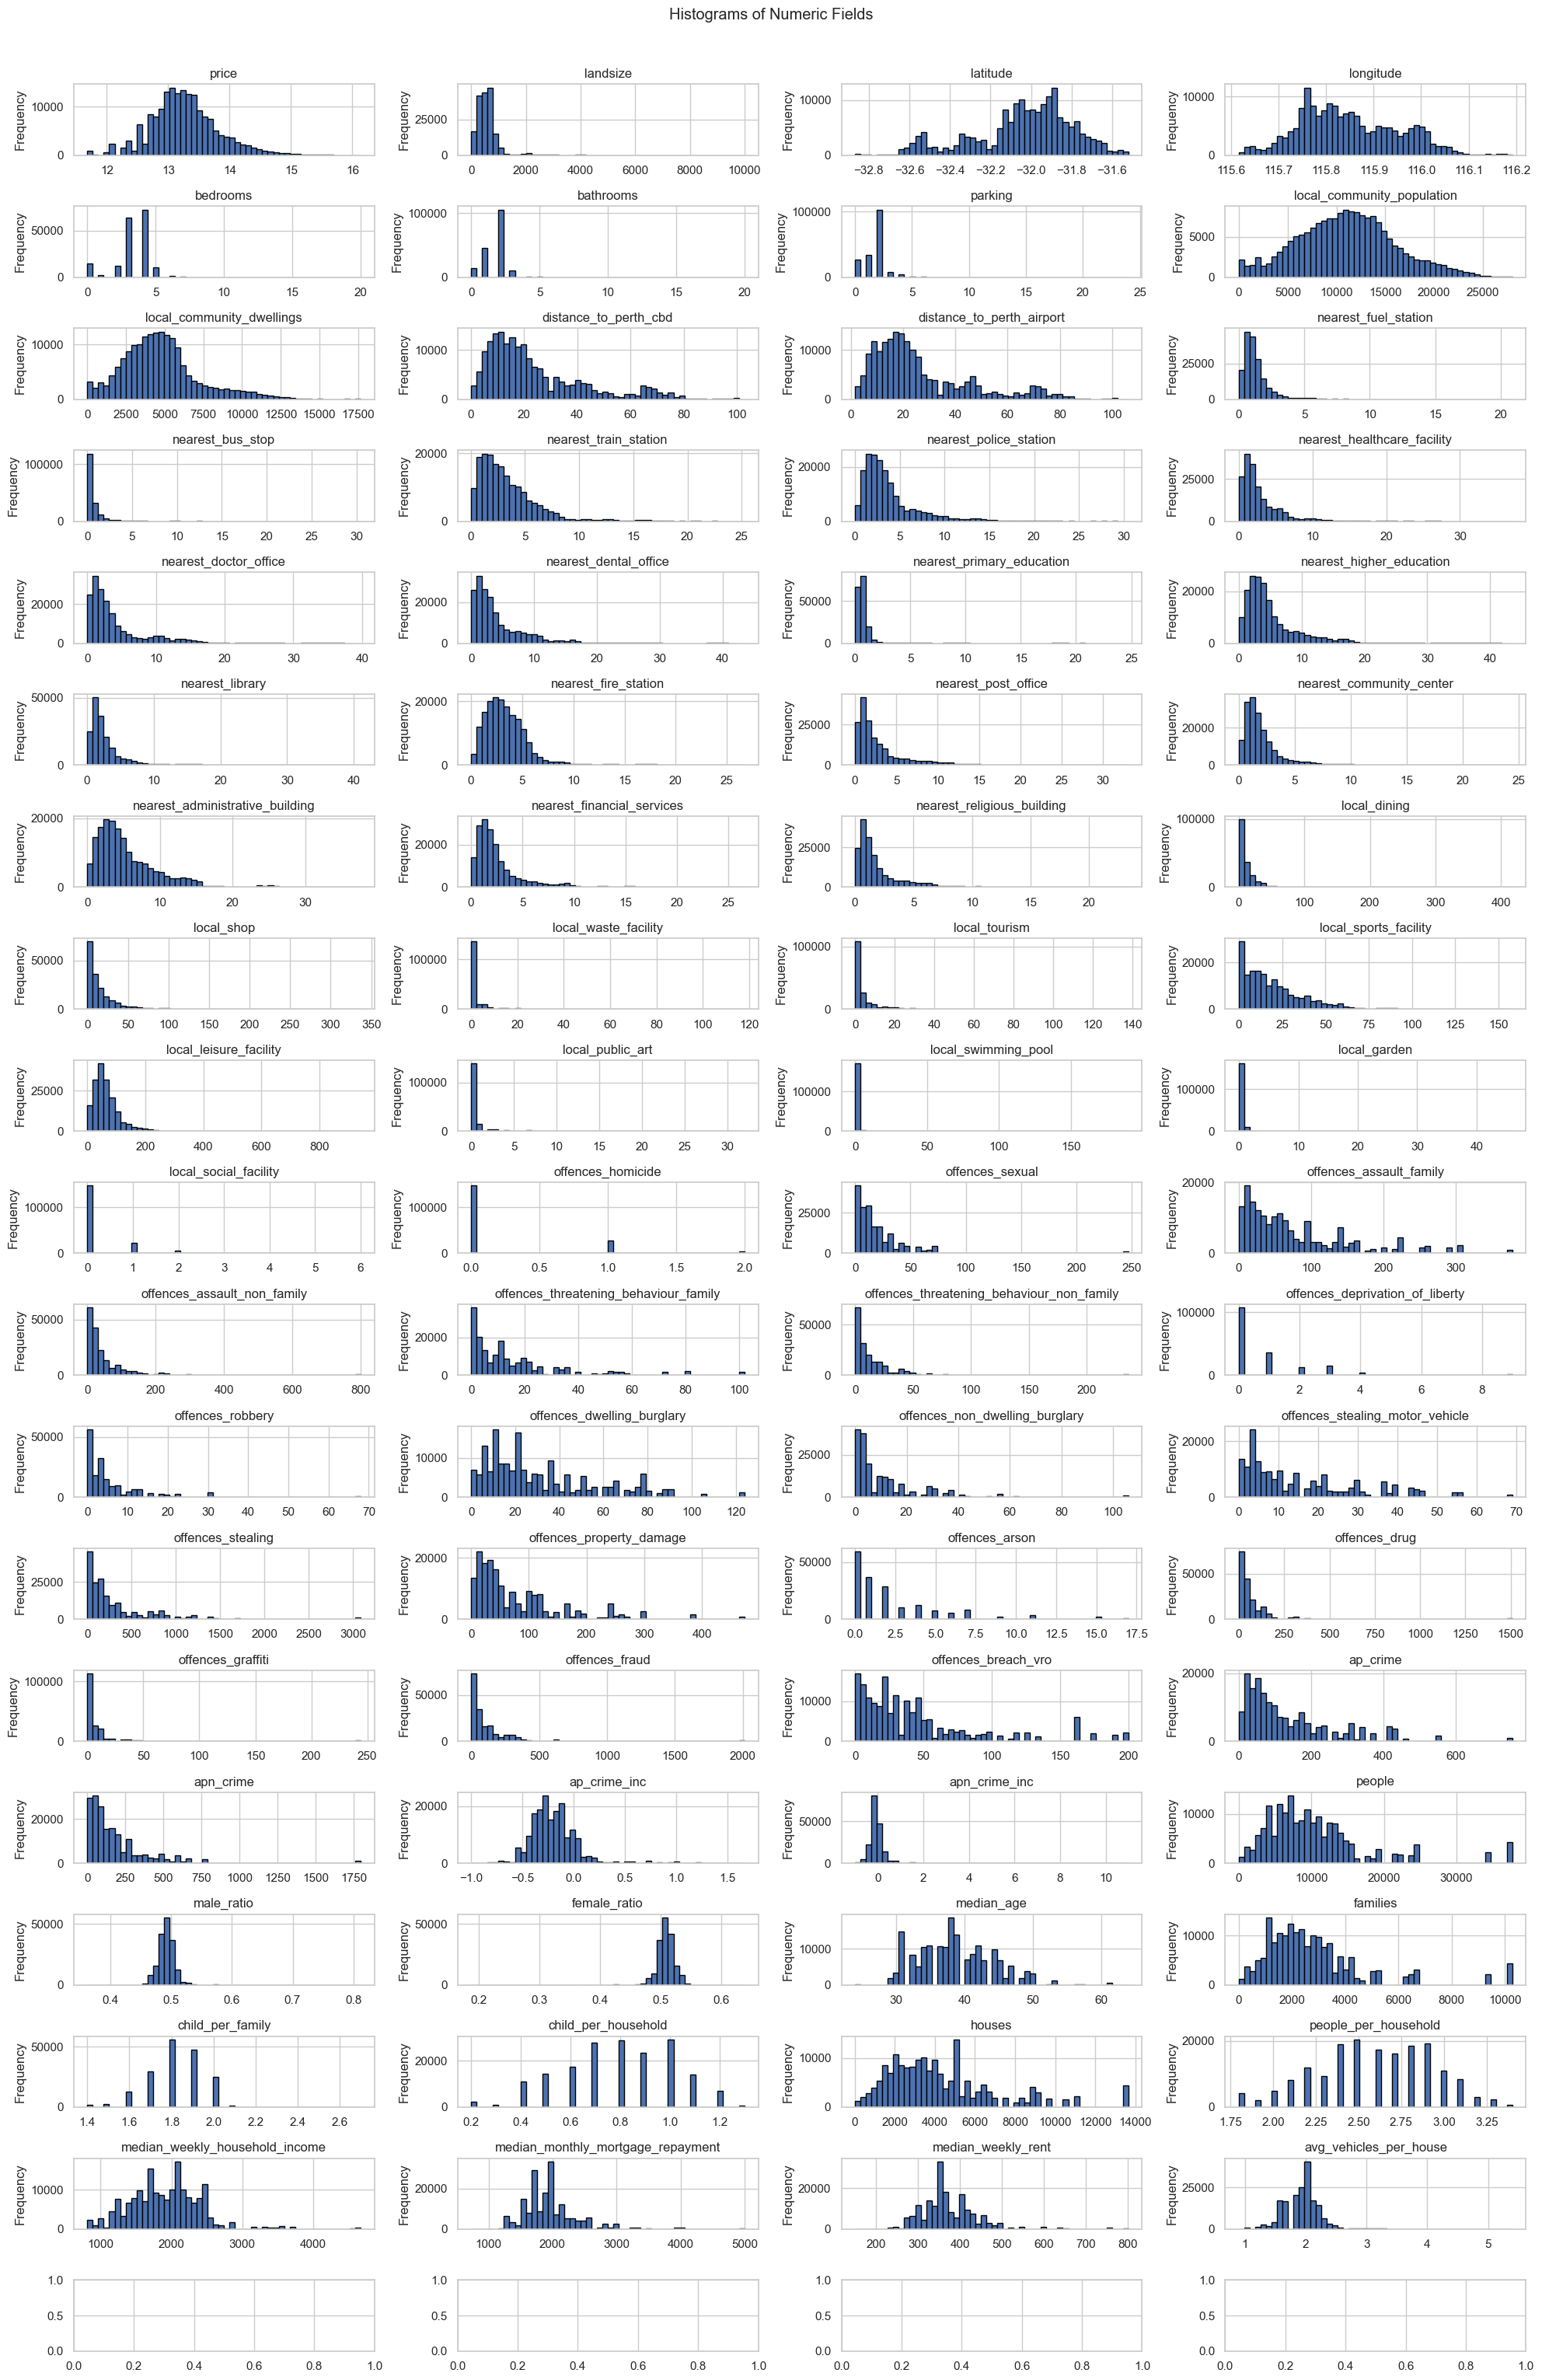

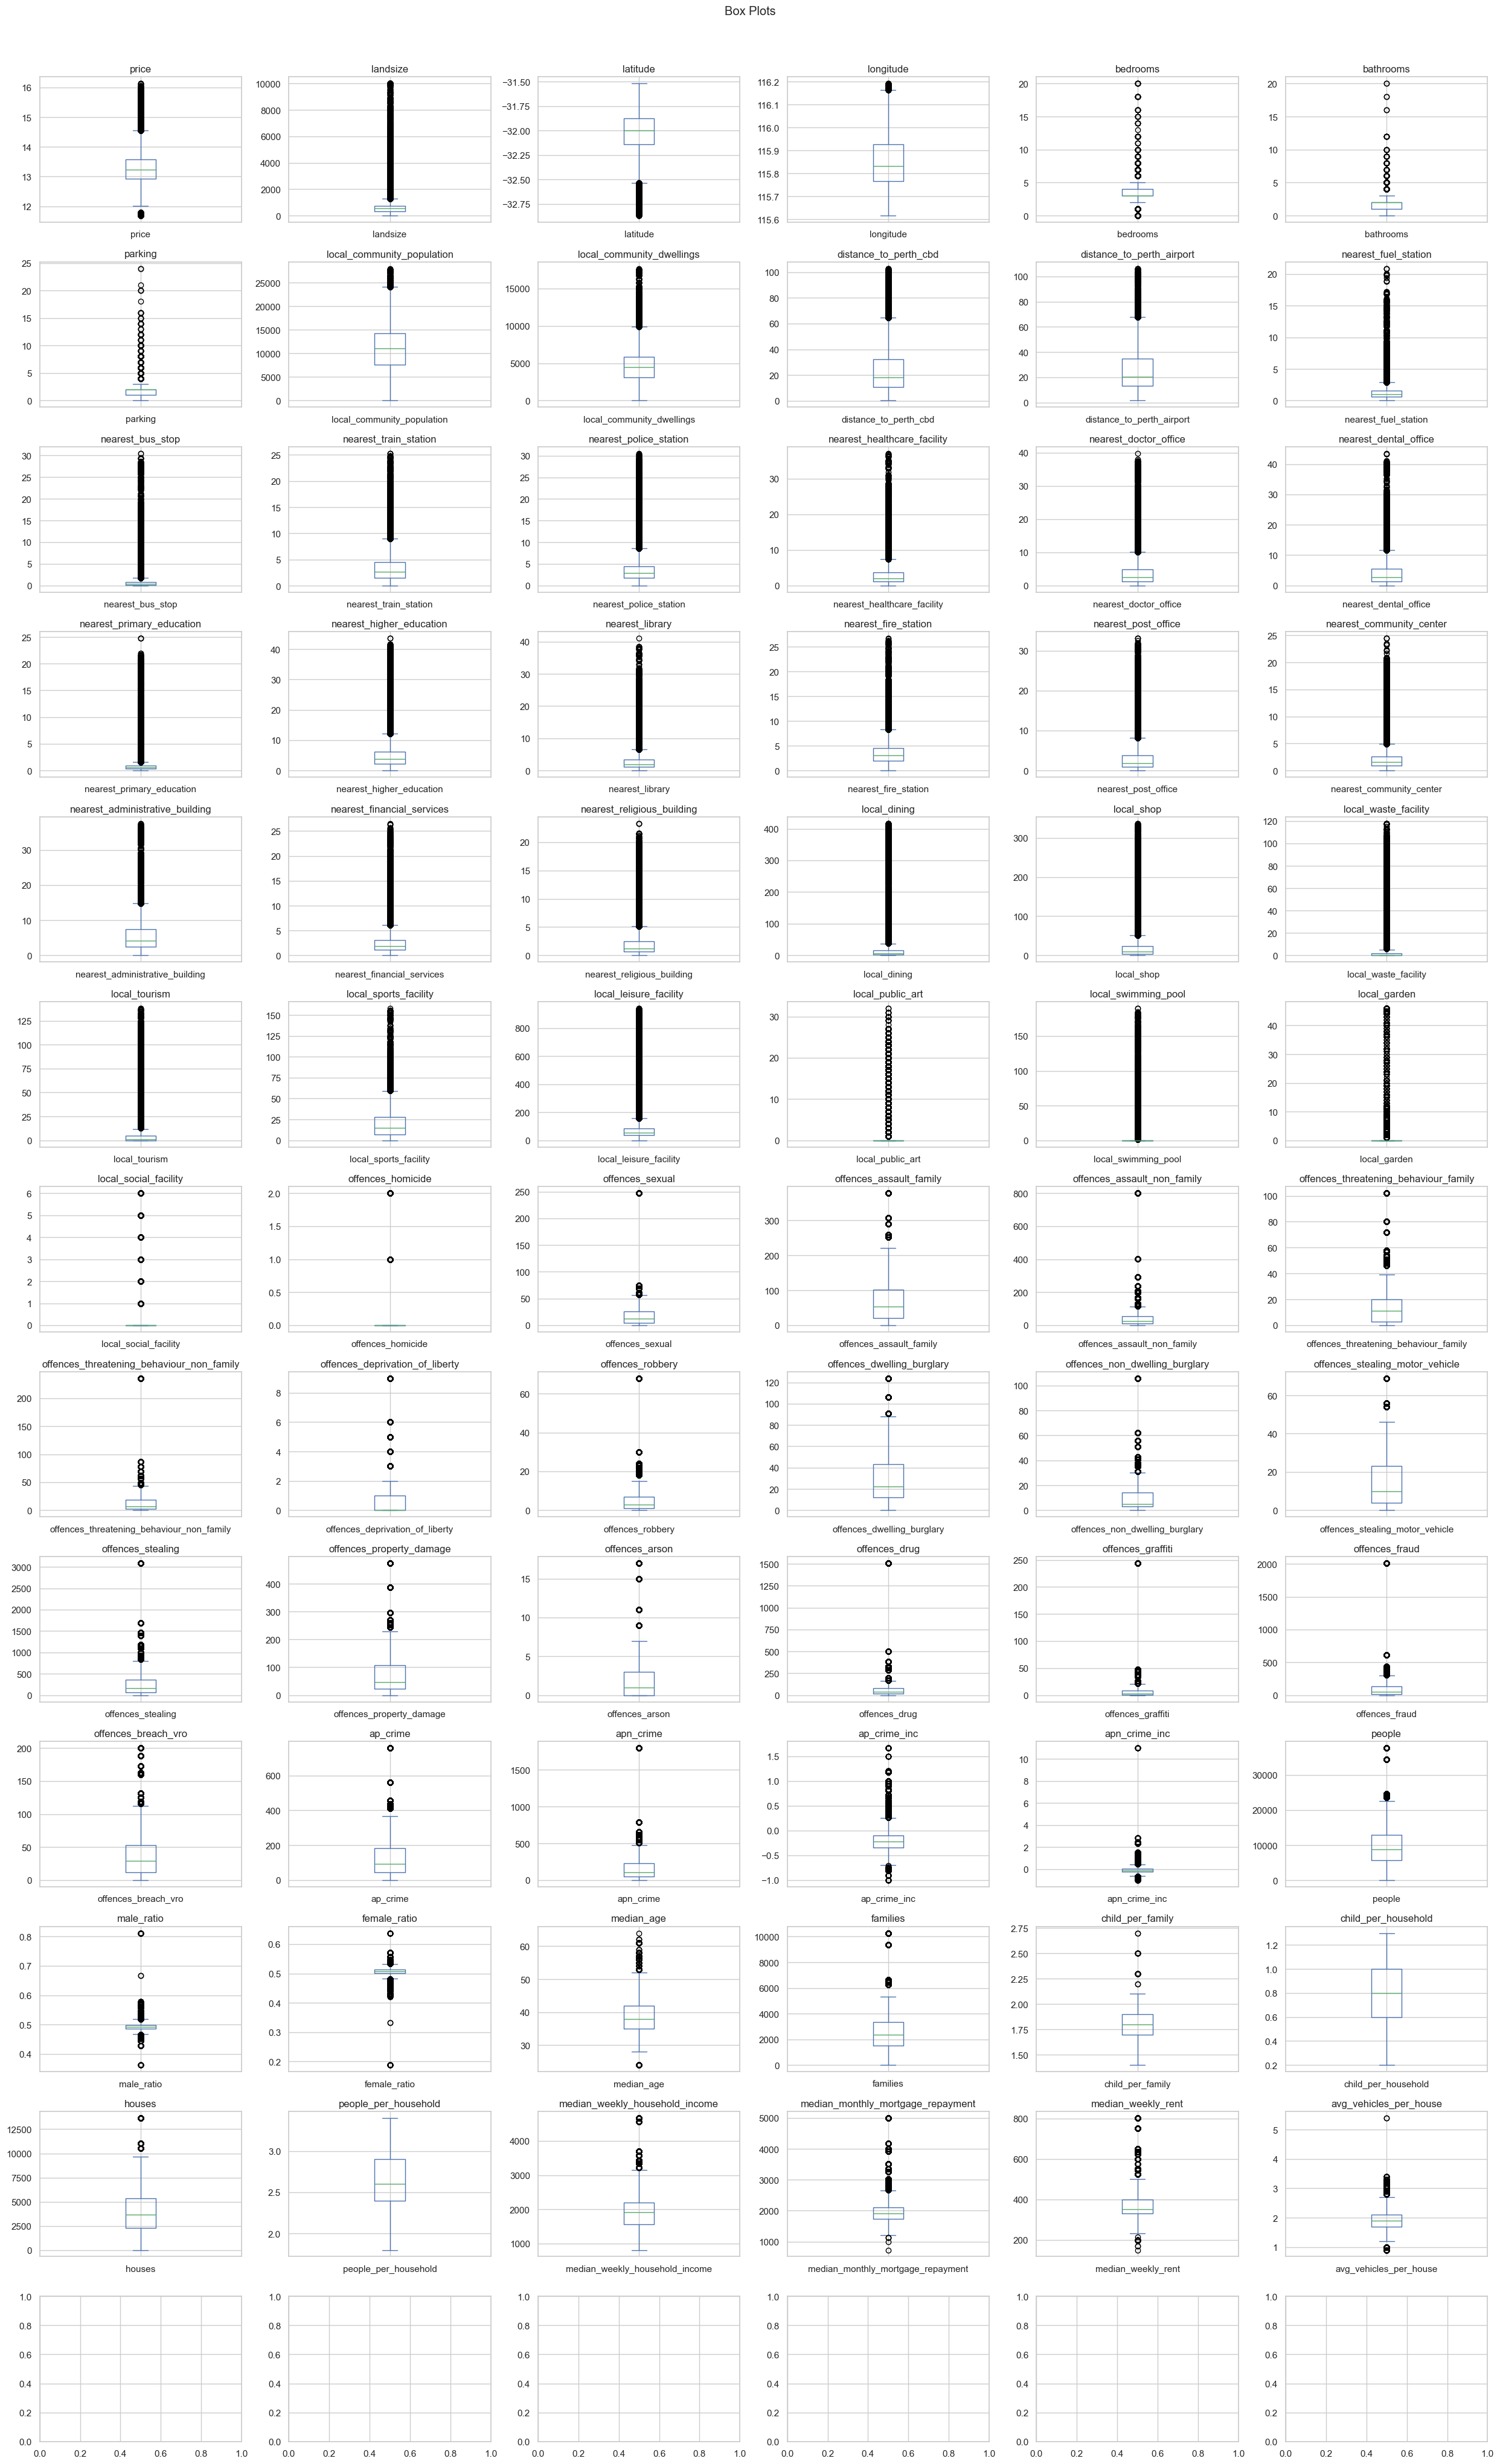

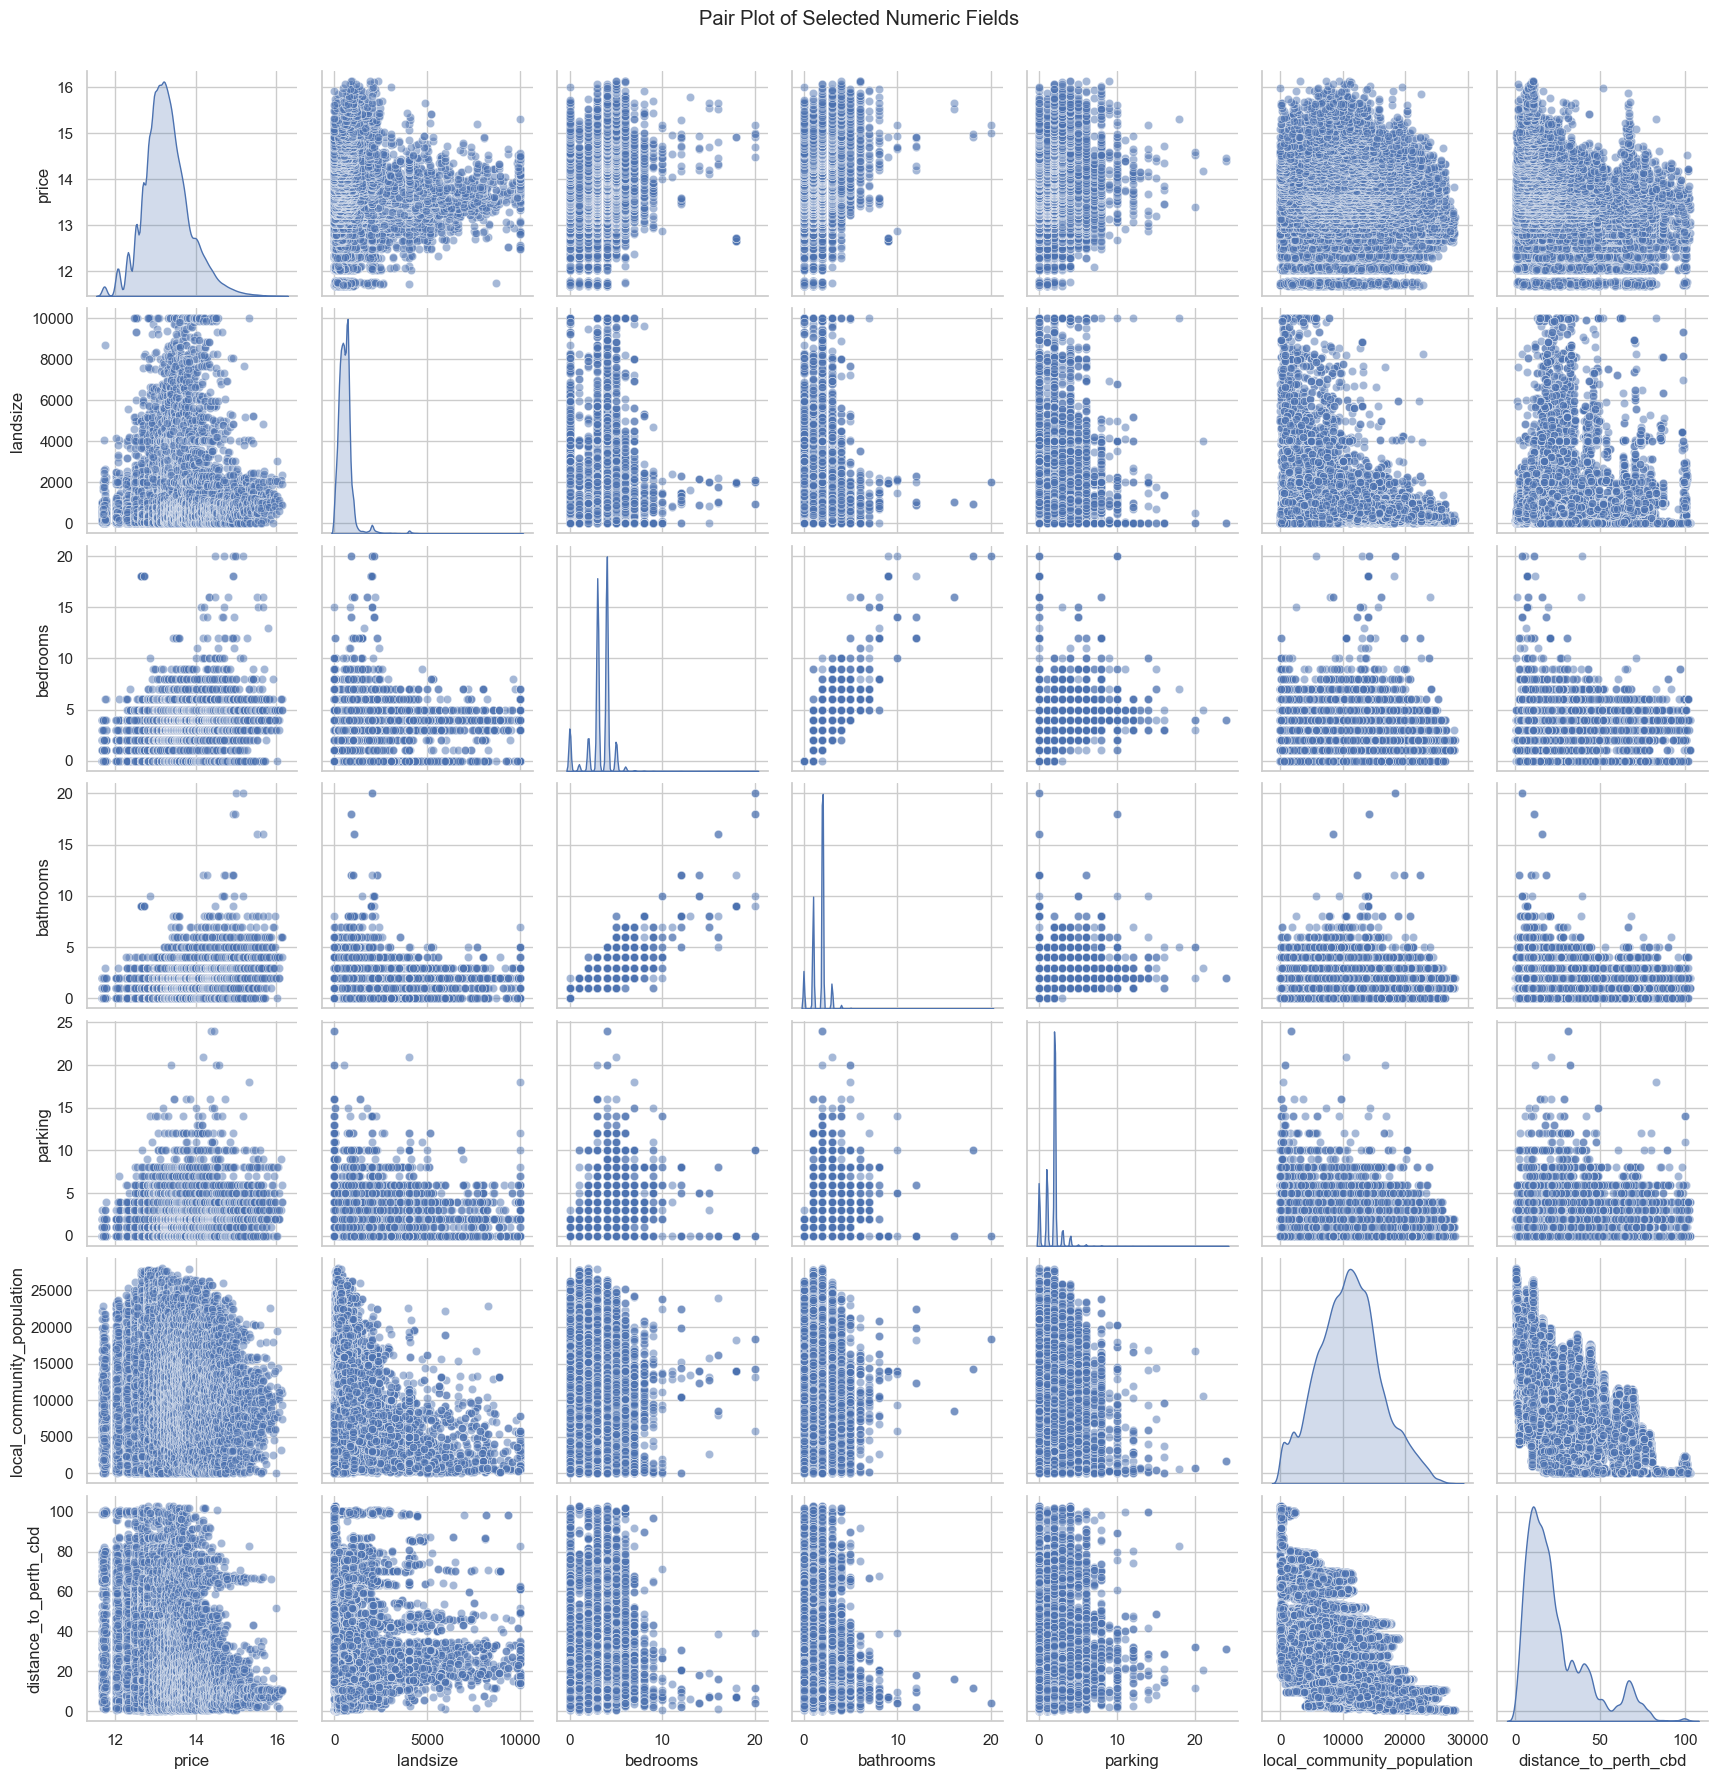

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histograms for numeric fields
def plot_histograms(df, numeric_columns):
    fig, axes = plt.subplots(len(numeric_columns)//4 + 1, 4, figsize=(20, 30))  # Adjusted to prevent label overlap
    axes = axes.flatten()
    for idx, col in enumerate(numeric_columns):
        df[col].plot(kind='hist', bins=50, edgecolor='black', ax=axes[idx])
        axes[idx].set_title(col)
    plt.tight_layout()
    plt.suptitle('Histograms of Numeric Fields', y=1.02)
    plt.show()

# Box plots to visualize the spread and detect potential outliers
def plot_boxplots(df, numeric_columns):
    fig, axes = plt.subplots(len(numeric_columns)//6 + 1, 6, figsize=(25, 40))  # Adjusted layout to support 72 columns
    axes = axes.flatten()
    for idx, col in enumerate(numeric_columns):
        df[col].plot(kind='box', ax=axes[idx])
        axes[idx].set_title(col)
    plt.tight_layout()
    plt.suptitle('Box Plots', y=1.02)
    plt.show()

# Pair plot for selected features to visualize pairwise relationships
def plot_pairplot(df, selected_columns):
    sns.pairplot(df[selected_columns], diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Pair Plot of Selected Numeric Fields', y=1.02)
    plt.show()

# Numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot histograms
plot_histograms(df, numeric_columns)

# Plot box plots
plot_boxplots(df, numeric_columns)

# Select a subset of columns for pair plot
selected_columns = ['price', 'landsize', 'bedrooms', 'bathrooms', 'parking', 'local_community_population', 'distance_to_perth_cbd']

# Plot pair plot
plot_pairplot(df, selected_columns)




In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Encode the categorical variable 'house_type'
house_type_encoded = pd.get_dummies(df['house_type'], prefix='house_type')

# Combine the encoded categorical variable with the numeric variables
df_encoded = pd.concat([df, house_type_encoded], axis=1)

# Create a new DataFrame for feature engineering
df_features = df_encoded.drop(['house_type', 'address', 'image_url', 'details_url', 'suburb'], axis=1)

# Split the data into sold and unsold houses
df_sold = df_features[df_features['is_sold'] == True].drop('is_sold', axis=1)
df_unsold = df_features[df_features['is_sold'] == False].drop('is_sold', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sold.drop('price', axis=1))
X_unsold_scaled = scaler.transform(df_unsold.drop('price', axis=1))

# Split the sold data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_sold['price'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_unsold_scaled, df_unsold['price'], test_size=0.5, random_state=42)




In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterSampler
from scipy.stats import uniform, randint
import numpy as np

# Define the parameter distributions
param_distributions = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 11),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Generate a list of hyperparameter configurations
n_configs = 10
config_list = list(ParameterSampler(param_distributions, n_iter=n_configs))

# Train and evaluate models with different hyperparameter configurations
best_rmse = float('inf')
best_model = None

for params in config_list:
    # Initialize the XGBoost regressor with the current hyperparameters
    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda', **params)
    
    # Train the model on the training data with early stopping
    xgb_regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
    
    # Evaluate the model on the test set
    y_pred_test = xgb_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))
    
    # Update the best model if the current model has a lower RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_model = xgb_regressor
        best_params = params

print("Best Hyperparameters: ", best_params)
print(f'Best Test RMSE: {best_rmse:.2f}')

# Predict on the unsold houses using the best model
y_pred_unsold = best_model.predict(X_unsold_scaled)
y_pred_unsold = np.exp(y_pred_unsold)

[0]	validation_0-rmse:0.67305
[1]	validation_0-rmse:0.63784
[2]	validation_0-rmse:0.60730
[3]	validation_0-rmse:0.58082
[4]	validation_0-rmse:0.55696
[5]	validation_0-rmse:0.53644
[6]	validation_0-rmse:0.52041
[7]	validation_0-rmse:0.50597
[8]	validation_0-rmse:0.49338
[9]	validation_0-rmse:0.48229
[10]	validation_0-rmse:0.47211
[11]	validation_0-rmse:0.46344
[12]	validation_0-rmse:0.45559
[13]	validation_0-rmse:0.44935
[14]	validation_0-rmse:0.44413
[15]	validation_0-rmse:0.43840
[16]	validation_0-rmse:0.43488
[17]	validation_0-rmse:0.43068
[18]	validation_0-rmse:0.42618
[19]	validation_0-rmse:0.42328
[20]	validation_0-rmse:0.41957
[21]	validation_0-rmse:0.41665
[22]	validation_0-rmse:0.41336
[23]	validation_0-rmse:0.41042
[24]	validation_0-rmse:0.40842
[25]	validation_0-rmse:0.40633
[26]	validation_0-rmse:0.40431
[27]	validation_0-rmse:0.40256
[28]	validation_0-rmse:0.40103
[29]	validation_0-rmse:0.39949
[30]	validation_0-rmse:0.39790
[31]	validation_0-rmse:0.39659
[32]	validation_0-